#  Predicting Car Insurance Purchase using Logistic Regression 

In [1]:
#importing the libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset

df = pd.read_csv("C:/Users/harkaran/Downloads/CarInsurance_train.csv")

In [3]:
df1 = pd.read_csv("C:/Users/harkaran/Downloads/CarInsurance_test.csv")

In [4]:
#checking the shape of the data

df.shape

(4000, 19)

In [5]:
df1.shape

(1000, 19)

In [6]:
#checking the first five rows of the data

df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [7]:
# Checking the statistical summary of the data

df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


C:\Users\harkaran\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


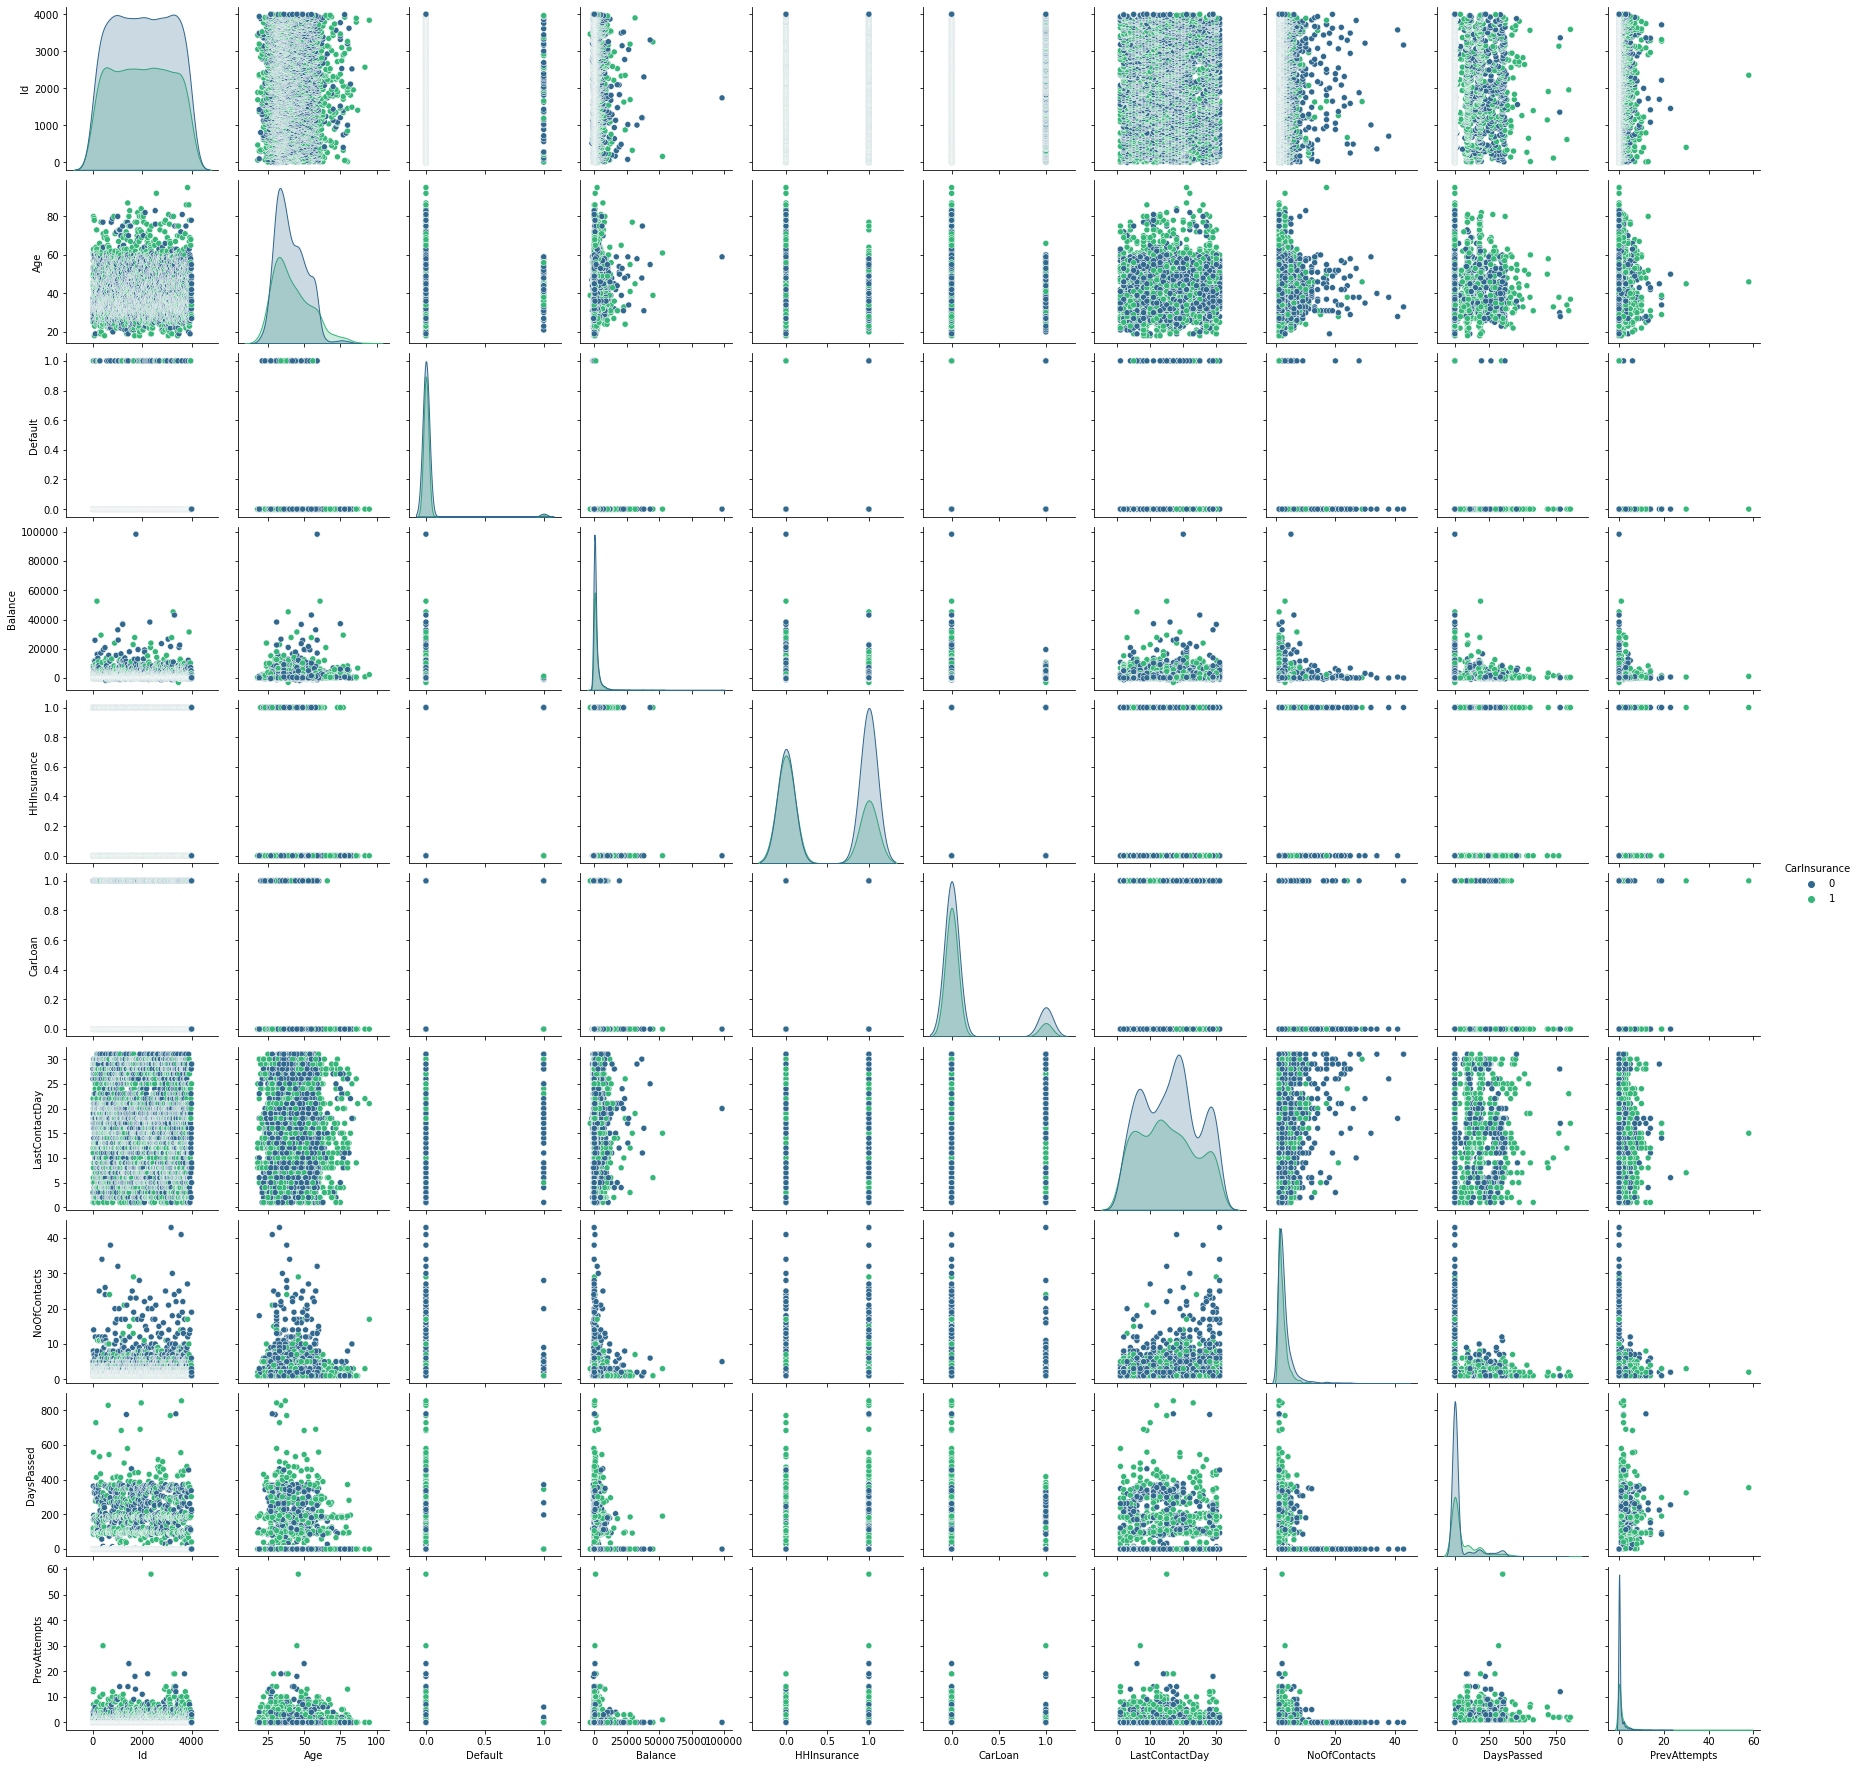

In [8]:
# Checking the visualization of the data 

sns.pairplot(df, hue = 'CarInsurance', palette = 'viridis', size = 2.5)
plt.show()

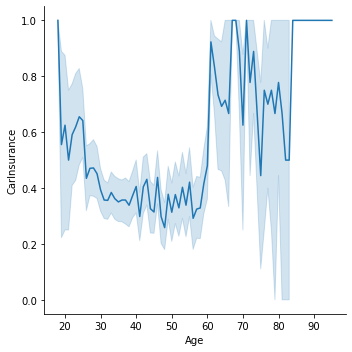

In [9]:
#Lets do some visualization

sns.relplot(x = 'Age', y = 'CarInsurance', data = df, kind = 'line')
plt.show()

 People whose age tend to be on the higher side are most likely to buy Insurance.

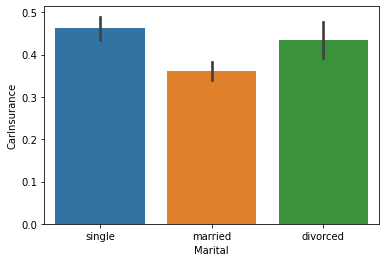

In [11]:
#visualizing with Marital column

sns.barplot(x = 'Marital', y = 'CarInsurance', data = df)
plt.show()

As we can see that Single category has more chances to buy the insurance. 

<AxesSubplot:xlabel='Job', ylabel='CarInsurance'>

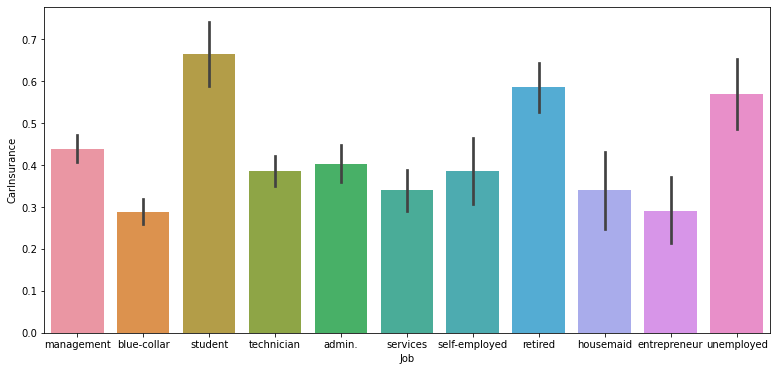

In [12]:
#Visualizing with Job column 

plt.figure( figsize = (13,6))
sns.barplot(x = 'Job', y = 'CarInsurance', data = df)

As shown in the above graph we can say that Students are more likely to buy Car insurance. 

<AxesSubplot:xlabel='LastContactMonth', ylabel='CarInsurance'>

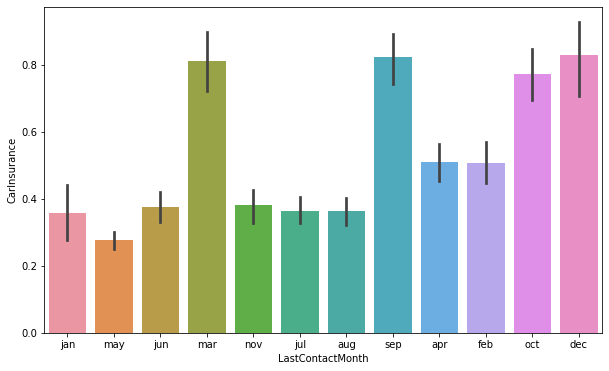

In [13]:
#Visualizing with No of contacts column 

plt.figure( figsize = (10,6))
sns.barplot(x = 'LastContactMonth', y = 'CarInsurance', data = df)

From the above we can see that people who contacted in the month of March, September and December buy insurance.

In [14]:
# Now we will handle missing values 

#Before treating them we need to merge both the data

concat_data = pd.concat([df, df1])

In [15]:
concat_data

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0.0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0.0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1.0
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1.0
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4996,31,admin.,single,secondary,0,131,1,0,cellular,15,jun,1,-1,0,NaN,13:54:24,13:56:55,NaN
996,4997,52,management,married,tertiary,0,2635,0,0,cellular,6,sep,1,108,8,success,13:13:38,13:18:51,NaN
997,4998,46,technician,married,tertiary,0,3009,0,0,cellular,4,aug,2,-1,0,NaN,10:23:35,10:24:33,NaN
998,4999,60,retired,married,secondary,0,7038,0,0,telephone,7,oct,4,-1,0,NaN,17:01:49,17:04:07,NaN


In [41]:
concat_data1 = concat_data.fillna({'CarInsurance': 0})

In [42]:
concat_data1

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0.0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0.0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1.0
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1.0
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4996,31,admin.,single,secondary,0,131,1,0,cellular,15,jun,1,-1,0,NaN,13:54:24,13:56:55,0.0
996,4997,52,management,married,tertiary,0,2635,0,0,cellular,6,sep,1,108,8,success,13:13:38,13:18:51,0.0
997,4998,46,technician,married,tertiary,0,3009,0,0,cellular,4,aug,2,-1,0,NaN,10:23:35,10:24:33,0.0
998,4999,60,retired,married,secondary,0,7038,0,0,telephone,7,oct,4,-1,0,NaN,17:01:49,17:04:07,0.0


In [43]:
concat_data1['Job'].mode()

0    management
dtype: object

In [44]:
#replacing the values in the job column by mode

concat_data1['Job'].fillna(concat_data1['Job'].mode()[0], inplace = True)

In [45]:
concat_data1

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0.0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0.0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1.0
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1.0
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4996,31,admin.,single,secondary,0,131,1,0,cellular,15,jun,1,-1,0,NaN,13:54:24,13:56:55,0.0
996,4997,52,management,married,tertiary,0,2635,0,0,cellular,6,sep,1,108,8,success,13:13:38,13:18:51,0.0
997,4998,46,technician,married,tertiary,0,3009,0,0,cellular,4,aug,2,-1,0,NaN,10:23:35,10:24:33,0.0
998,4999,60,retired,married,secondary,0,7038,0,0,telephone,7,oct,4,-1,0,NaN,17:01:49,17:04:07,0.0


In [46]:
concat_data1['Education'].mode()

0    secondary
dtype: object

In [47]:
#replacing the values in the Education column by mode

concat_data1['Education'].fillna(concat_data1['Education'].mode()[0], inplace = True)

In [48]:
concat_data1['Communication'].mode()

0    cellular
dtype: object

In [49]:
#replacing the values in the communication column by mode
concat_data1['Communication'].fillna(concat_data1['Communication'].mode()[0], inplace = True)

In [50]:
concat_data1['Outcome'].mode()

0    failure
dtype: object

In [51]:
#replacing the values in the Outcome column by mode

concat_data1['Outcome'].fillna(concat_data1['Outcome'].mode()[0], inplace = True)

In [52]:
concat_data1

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,failure,13:45:20,13:46:30,0.0
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,failure,14:49:03,14:52:08,0.0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1.0
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,failure,12:06:43,12:20:22,1.0
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,failure,14:35:44,14:38:56,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4996,31,admin.,single,secondary,0,131,1,0,cellular,15,jun,1,-1,0,failure,13:54:24,13:56:55,0.0
996,4997,52,management,married,tertiary,0,2635,0,0,cellular,6,sep,1,108,8,success,13:13:38,13:18:51,0.0
997,4998,46,technician,married,tertiary,0,3009,0,0,cellular,4,aug,2,-1,0,failure,10:23:35,10:24:33,0.0
998,4999,60,retired,married,secondary,0,7038,0,0,telephone,7,oct,4,-1,0,failure,17:01:49,17:04:07,0.0


In [53]:
concat_data1

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,failure,13:45:20,13:46:30,0.0
1,2,32,blue-collar,married,primary,0,1156,1,0,cellular,26,may,5,-1,0,failure,14:49:03,14:52:08,0.0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1.0
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,failure,12:06:43,12:20:22,1.0
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,failure,14:35:44,14:38:56,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4996,31,admin.,single,secondary,0,131,1,0,cellular,15,jun,1,-1,0,failure,13:54:24,13:56:55,0.0
996,4997,52,management,married,tertiary,0,2635,0,0,cellular,6,sep,1,108,8,success,13:13:38,13:18:51,0.0
997,4998,46,technician,married,tertiary,0,3009,0,0,cellular,4,aug,2,-1,0,failure,10:23:35,10:24:33,0.0
998,4999,60,retired,married,secondary,0,7038,0,0,telephone,7,oct,4,-1,0,failure,17:01:49,17:04:07,0.0


# Training the Model

In [54]:
#Storing the variable

X = new_data.drop(columns = ['Id', 'CarInsurance','CallStart','CallEnd' ], axis = 1)

Y = new_data['CarInsurance']

In [55]:
#Splitting the data 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, random_state = 2)

In [56]:
X_train.shape

(4000, 37)

In [57]:
X_test.shape

(1000, 37)

In [58]:
#Importing our Model

from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression()

In [60]:
model.fit(X_train, Y_train)

C:\Users\harkaran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

 # Model Evaluation  

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
training_data_prediction = model.predict(X_train)

In [63]:
training_score = accuracy_score(Y_train, training_data_prediction)

In [64]:
print('Training Data Score :', training_score)

Training Data Score : 0.70325


In [65]:
test_data_prediction = model.predict(X_test)


In [66]:
test_score = accuracy_score(Y_test, test_data_prediction)

In [67]:
print('Test Data Score :', test_score)

Test Data Score : 0.724


 # Our model evaluates at an Accuracy of 70% in Training data and 72% in Test data